# Lecture 1 (pt. 2)

## Basic python operations
## Set operations
## First Random Experiment and Simulations
## Fair experiment and relative frequency

Working with lists:

In [1]:
a=[2,3]
b=a
a is b


True

In [2]:
b.append(4)
b

[2, 3, 4]

In [3]:
a

[2, 3, 4]

You can also append to lists with +:

In [4]:
b = a.copy()

b is a

False

In [5]:
b.append(5)
b

[2, 3, 4, 5]

In [6]:
a

[2, 3, 4]

Lists and tuples may contain any other objects, including other lists and tuples:

In [7]:
c =(1,2,4)

In [8]:
type(c)

tuple

Note that tuples and lists are ordered collections, and we can access their members directly:

In [9]:
a[0]

2

In [10]:
c[0]

1

* Negative indexes start from the end of the list, with -1 denoting the last member in the list:

In [11]:
c[-1]

4

## Modules and Libraries

* Many of the tools we will use in the class are not directly part of Python
* Instead, they are libraries or modules that provide particular functionality
* These include:

* **numpy** provides arrays, linear algebra, and math functions (many similar to the core MATLAB functions)
* **matplotlib** provides functions to generate plots similar to those in MATLAB
* **random** contains functions for generating random numbers and choices
* **scipy** provides many tools used in scientific computing including optimization, signal processing, and statistics
* **pandas** provides tools for working with data

To work with these libraries, import them:

In [12]:
!jt -r  #(reset to default theme in jupyter)

Reset css and font defaults in:
/Users/Jie/.jupyter/custom &
/Users/Jie/Library/Jupyter/nbextensions


In [13]:
# use jupytertheme to change font size and theme (used in lecture only)
!jt -t grade3 -fs 24  -tfs 24 -ofs 22 -cellw 100%
#!jt  -fs 12


# Sets

In [14]:
Aset = {1,2,4}
print(Aset)

{1, 2, 4}


In [15]:
Aset= set([1,1,1,2,3,4])
print(Aset)

{1, 2, 3, 4}


## Union

In [16]:
Bset= {3,4,5}
AunionB = set.union(Aset,Bset)
print(AunionB)

{1, 2, 3, 4, 5}


## set difference

In [17]:
Cset = Aset - Bset
print(Cset)

{1, 2}


## set intersection

In [18]:
Dset = Aset.intersection(Bset)
print(Dset)

{3, 4}


see [More about Python Sets]{https://realpython.com/python-sets/}

## import some library for the following experiments

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# First Random Experiment and Simulations

Consider the following questions:

1. **If you flip a coin 20 times, how many times do you think it will come up heads?** 

2. **If you flip the coin 20 times and it comes up heads 6 times, do you think it is a *fair* or *unfair* coin? How *confident* can you be in your answer?**

* Can you conduct an experiment to answer these questions? 
* What can be a potential problem?

If we take a **fair coin** and flip it 20 times and count the number of heads, and then **repeat the experiment many times**, we can **estimate** how often 6 or fewer heads occurs. If it occurs very rarely (say, less than 5% of the time, then we can say that the coin is unlikely to be fair).

*Here we use 6 or fewer heads because if 5 heads occurs, that is an even  more extreme outcome than 6 heads occurring, and so we want to count up how often we see an outcome as extreme OR MORE as 6 heads occurring.*

* The **problem** is that we may need to repeat the experiment (of flipping the coin 20 times) many times to accurately estimate how often 6 or fewer heads come up. This may require thousands of coin flips!

We can overcome this problem by using a computer to flip the coin in a **simulation**. A **computer simulation** is a computer program that models reality and allows us to conduct experiments that:

* would require a lot of time to carry out in real life
* would require a lot of resources to carry out in real life
* would not be possible to repeat in real life (for instance, simulation of the next day's weather or stock market performance)

Let's build simulations of our coin flip experiment and learn about some Python libraries:

In [20]:
# Simple library for working with random phenomena
import numpy
import random

# to learn about random.choice, random.choices, and random.randint function




In [21]:
# flip one coin

faces = ['H','T'] # sample space of one coin flip

In [22]:
random.choice(faces)

'H'

In [23]:
?random.choices
random.choices(faces, k=20)

['T',
 'T',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'T']

Signature: random.choices(population, weights=None, *, cum_weights=None, k=1)
Docstring:
Return a k sized list of population elements chosen with replacement.

If the relative weights or cumulative weights are not specified,
the selections are made with equal probability.
File:      ~/opt/anaconda3/lib/python3.9/random.py
Type:      method


In [24]:
# Generate a random integer between 1 and 10 (both inclusive)
random_number = random.randint(1, 10)
random_number # for die roll experiment

4

Suppose we want to see how often 6 or fewer heads occurs. We can reduce the printing by only printing those extreme events:

In [25]:
coins = random.choices(faces, k=20)
coins.count('H')

10

In [26]:
coins.count(0)

0

In [27]:
# perform repeated experiments
num_sims = 25
flips = 20

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    print(sim, ': ', num_heads, ' Head')

0 :  9  Head
1 :  9  Head
2 :  13  Head
3 :  15  Head
4 :  9  Head
5 :  8  Head
6 :  9  Head
7 :  12  Head
8 :  12  Head
9 :  9  Head
10 :  12  Head
11 :  13  Head
12 :  13  Head
13 :  9  Head
14 :  7  Head
15 :  13  Head
16 :  9  Head
17 :  8  Head
18 :  11  Head
19 :  7  Head
20 :  7  Head
21 :  8  Head
22 :  9  Head
23 :  8  Head
24 :  7  Head


* We really don't care about the particular experiment on which those events occur. Instead, we are really just looking at the **frequency** of those events.

<div class="alert alert-info" role="alert">
  <strong>Relative Frequency</strong>
    
The <strong>relative frequency</strong> of an event is the number of times that an event occurs divided by the number of times the experiment is conducted. 
</div>

Let's modify the experiment to calculate the relative frequency of getting 6 or fewer heads on 20 flips of a fair coin:

In [28]:
# perform repeated experiments
num_sims = 25
flips = 20
# add a counter: for counting the number of times event occurs: 
# Event: num of heads <= 6
counts = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads <=6:
        counts += 1 # counts = counts+1

print('In ', num_sims, 'experiments', '<= 6 heads occurred: ', counts)

In  25 experiments <= 6 heads occurred:  0


In [29]:
# calculate relative frequency
num_sims = 5000
flips = 20
# add a counter: for counting the number of times event occurs: 
# Event: num of heads <= 6
counts = 0

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads <=6:
        counts += 1 # counts = counts+1

print('Relative frequency of <=6 heads is', counts/num_sims)

Relative frequency of <=6 heads is 0.0548


# Fair Experiment

**<font color=blue>Example 1:</font>**: The probability of getting any number on a fair 6-sided die is 1/6. Let's compare these to the *relative frequencies*.

But first let's see how to count the number of occurrences of each outcome:

In [30]:
num_sims=1000
values=[] # output of the die roll.

for sim in range(num_sims):
    die=random.choice(range(1,7)) # range(1,7) =[1,2,3,4,5,6]
    values += [die] # values.append(die)
print(values)

[5, 1, 2, 5, 4, 2, 5, 2, 2, 2, 6, 1, 5, 3, 1, 4, 4, 3, 5, 4, 5, 5, 5, 1, 5, 2, 3, 6, 5, 3, 1, 5, 6, 6, 3, 2, 6, 2, 3, 5, 2, 1, 1, 3, 4, 3, 3, 4, 6, 3, 4, 3, 1, 6, 6, 1, 2, 1, 2, 1, 3, 2, 3, 5, 1, 3, 2, 6, 4, 1, 4, 3, 5, 1, 2, 6, 3, 6, 6, 4, 6, 1, 4, 4, 4, 5, 4, 6, 4, 4, 6, 2, 3, 5, 4, 3, 5, 4, 3, 4, 4, 6, 6, 3, 4, 1, 4, 3, 6, 5, 5, 3, 2, 4, 2, 6, 5, 2, 2, 3, 1, 4, 6, 5, 6, 1, 5, 6, 6, 3, 5, 2, 2, 3, 4, 4, 4, 3, 3, 2, 6, 1, 4, 6, 3, 6, 2, 3, 4, 6, 2, 6, 1, 2, 3, 1, 2, 3, 3, 1, 4, 2, 3, 6, 1, 4, 4, 6, 3, 4, 3, 1, 2, 4, 2, 5, 3, 2, 6, 3, 1, 2, 3, 3, 2, 3, 6, 6, 2, 2, 3, 4, 4, 1, 5, 3, 6, 2, 1, 5, 3, 6, 2, 2, 1, 1, 1, 3, 3, 2, 6, 5, 2, 2, 4, 6, 3, 2, 4, 6, 2, 4, 1, 4, 3, 4, 5, 4, 3, 3, 1, 1, 2, 6, 3, 4, 3, 3, 2, 6, 1, 1, 1, 3, 3, 5, 6, 6, 6, 4, 1, 5, 2, 3, 1, 1, 6, 4, 2, 3, 5, 3, 6, 2, 1, 6, 1, 4, 4, 5, 2, 6, 6, 1, 3, 6, 3, 5, 5, 6, 1, 6, 2, 6, 3, 6, 6, 6, 5, 5, 4, 2, 3, 5, 3, 4, 1, 5, 2, 3, 5, 4, 5, 2, 4, 1, 3, 2, 6, 5, 6, 3, 3, 5, 3, 1, 2, 5, 6, 3, 6, 3, 3, 2, 4, 1, 1, 1, 2, 3, 3, 4, 1, 

Let's first keep a counter for each face value and increment that counter whenever we see that face value. Start with a list of 6 zeros:

In [31]:
import numpy as np
counters = np.zeros(6)
counters

array([0., 0., 0., 0., 0., 0.])

We can use these counters to make our first plots. Let's start with a simple bar graph:

In [32]:
for sim in range(num_sims):
    die=random.choice(range(1,7)) # range(1,7) =[1,2,3,4,5,6]
    values += [die] # values.append(die)
    counters[die-1] += 1
counters

array([164., 173., 153., 177., 149., 184.])

In [33]:
vals = list(range(1,7))
vals

[1, 2, 3, 4, 5, 6]

Adding some labels for the bar plot

Text(0, 0.5, 'Number of Occurences')

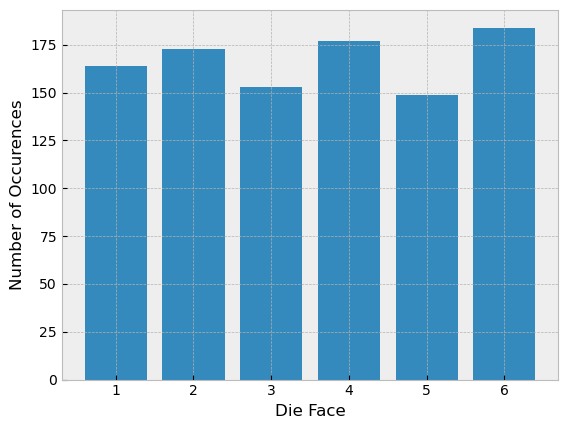

In [34]:
import matplotlib.pyplot as plt

plt.bar(vals, counters)
plt.xlabel('Die Face')
plt.ylabel('Number of Occurences')

Here is a more elegant approach (using ```numpy```) if we just want the counts of the outcomes:

In [35]:
num_sims=100
outcomes=[]
for sim in range(num_sims):
    die=random.choice(range(1,7))
    outcomes+=[die]
    
# The magic counting code goes here...

# TO BE COMPLETED IN CLASS

In [37]:
outcomes

[5,
 3,
 1,
 1,
 6,
 1,
 5,
 4,
 2,
 2,
 3,
 6,
 3,
 1,
 1,
 5,
 2,
 1,
 1,
 4,
 1,
 5,
 2,
 3,
 4,
 5,
 2,
 6,
 1,
 4,
 6,
 5,
 1,
 6,
 5,
 6,
 1,
 3,
 6,
 3,
 5,
 1,
 6,
 1,
 5,
 2,
 6,
 3,
 3,
 6,
 6,
 2,
 5,
 6,
 4,
 4,
 3,
 6,
 3,
 5,
 2,
 6,
 1,
 2,
 1,
 6,
 5,
 2,
 1,
 4,
 1,
 4,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 2,
 4,
 3,
 3,
 5,
 6,
 1,
 1,
 3,
 5,
 4,
 1,
 6,
 4,
 3,
 2,
 1,
 3,
 5,
 6]

In [36]:
np.unique(outcomes, return_counts =True)

(array([1, 2, 3, 4, 5, 6]), array([21, 12, 15, 11, 20, 21]))

Text(0, 0.5, 'Number of Occurences')

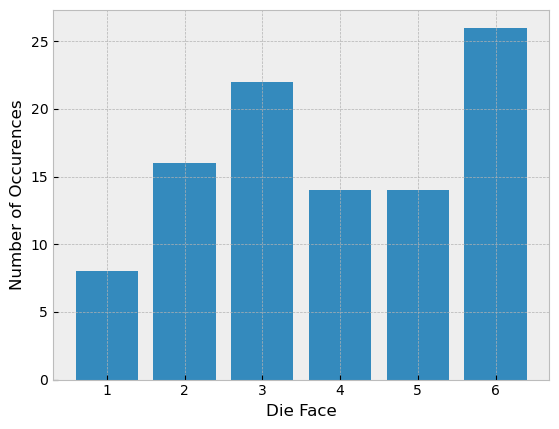

In [38]:
vals1, counters2 = np.unique(outcomes, return_counts =True)

plt.bar(vals1, counters2)
plt.xlabel('Die Face')
plt.ylabel('Number of Occurences')

Then to get the **relative frequencies** is easy:

In [38]:
num_sims=100
outcomes=[]
for sim in range(num_sims):
    die=random.choice(range(1,7))
    outcomes+=[die]

vals, counts = np.unique(outcomes, return_counts = True)
# TO BE COMPLETED IN CLASS 

for i in range(len(vals)):
    print(vals[i], counts[i]/num_sims)

1 0.09
2 0.27
3 0.15
4 0.18
5 0.09
6 0.22


Text(0, 0.5, 'Relative frequency')

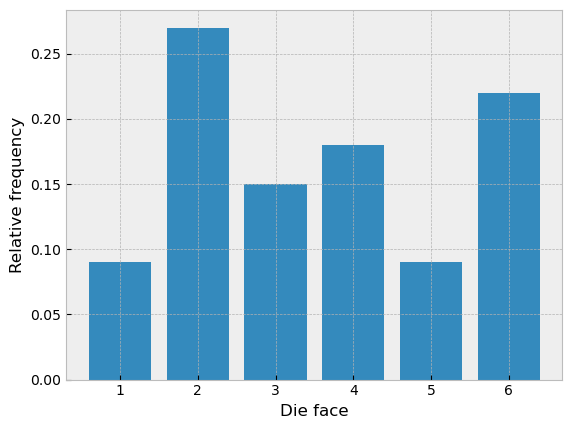

In [39]:
plt.bar(vals, counts/num_sims)
plt.xlabel('Die face')
plt.ylabel('Relative frequency')

In [42]:
def relDieFace(num_sims):
    outcomes=[]
    relf = []
    for sim in range(num_sims):
        die=random.choice(range(1,7))
        outcomes+=[die]
    vals, counts = np.unique(outcomes, return_counts = True)
    for i in range(len(vals)):
        relf +=[counts[i]/num_sims]
        
    return vals, counts, relf

In [44]:
vals, counts, relf = relDieFace(1000)
print(vals, counts, relf)

[1 2 3 4 5 6] [162 197 181 149 171 140] [0.162, 0.197, 0.181, 0.149, 0.171, 0.14]


* How does the relative frequency of each outcome change as we increase/decrease the number of simulations?

* What is your conclusion in terms of amount of data needed?

* Does the relative frequency *converge* to some value as the number of simulations increases?